In [2]:
from math import log 
import operator
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.sans-serif']=[u'SimHei']
matplotlib.rcParams['axes.unicode_minus']=False

In [4]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1
    shannonEnt = 0.0
    for label in labelCounts.keys():
        prob = float(labelCounts[label])/numEntries
        shannonEnt -= prob*log(prob,2)
    return shannonEnt
def splitDataSet(dataSet,axis,value):
    retDataSet = []
    for featVec in dataSet:
        if featVec[axis]==value:
            reducedFeatVec = featVec[:axis]
            reducedFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reducedFeatVec)
    return retDataSet
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0])-1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet,i,value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob*calcShannonEnt(subDataSet)
        infoGain = baseEntropy - newEntropy
        if infoGain > bestInfoGain:
            bestInfoGain = infoGain
            bestFeature = i
    return bestFeature

In [7]:
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCount[vote]=0
        classCount[vote]+=1
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del labels[bestFeat]
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value]=createTree(splitDataSet(dataSet,bestFeat,value),subLabels)
    return myTree

In [8]:
def plotNode(nodeTxt,centerPt,parentPt,nodeType):
    createPlot.ax1.annotate(nodeTxt,xy=parentPt,xycoords='axes fraction',xytext= centerPt,textcoords='axes fraction',va='center',ha='center',bbox=nodeType,arrowprops=arrow_args)

def createPlot():
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    createPlot.ax1 = plt.subplot(111,frameon=False)
    plotNode('决策节点',(0.5,0.1),(0.1,0.5),decisionNode)
    plotNode('叶节点',(0.8,0.1),(0.3,0.8),leafNode)
    plt.show()

In [11]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            numLeafs += getNumLeafs(secondDict[key])
        else:
            numLeafs += 1
    return numLeafs
def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else:
            thisDepth =1
        if thisDepth > maxDepth:
            maxDepth = thisDepth
    return maxDepth
def plotMidText(cntPt,parentPt,txtString):
    xMid = (parentPt[0]-cntPt[0])/2+cntPt[0]
    yMid = (parentPt[1]-cntPt[1])/2+cntPt[1]
    createPlot.ax1.text(xMid,yMid,txtString)
    

{'age': {'22 3': '2', '24 3': '3', '3': '3', '9': '3', '15 2': '3', '16 2': '3', '5': '3', '17 3': '3', '8': '1', '18 3': '3', '7': '3', '6': '2', '21 3': '3', '11 2': '3', '23 3': '3', '2': '2', '10 2': '2', '12 2': '1', '19 3': '3', '4': '1', '14 2': '2', '1': '3', '13 2': '3', '20 3': '1'}}


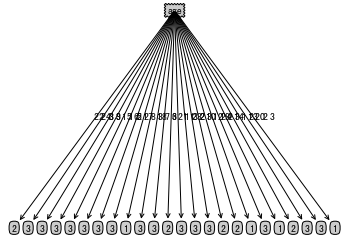

In [12]:
def plotTree(myTree,parentPt,nodeTxt):
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0]
    cntrPt = (plotTree.xOff + (1 + float(numLeafs))/2/plotTree.totalW,plotTree.yOff)
    plotMidText(cntrPt,parentPt,nodeTxt)
    plotNode(firstStr,cntrPt,parentPt,decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff-1/plotTree.totalD
    for key in secondDict.keys():
        if type(secondDict[key]).__name__=='dict':
            plotTree(secondDict[key],cntrPt,str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1/plotTree.totalW
            plotNode(secondDict[key],(plotTree.xOff,plotTree.yOff),cntrPt,leafNode)
            plotMidText((plotTree.xOff,plotTree.yOff),cntrPt,str(key))
    plotTree.yOff = plotTree.yOff + 1 / plotTree.totalD

def createPlot(inTree):
    fig = plt.figure(1,facecolor='white')
    fig.clf()
    axprops = dict(xticks=[],yticks=[])
    createPlot.ax1 = plt.subplot(111,frameon=False,**axprops)
    plotTree.totalW = float(getNumLeafs(inTree))
    plotTree.totalD = float(getTreeDepth(inTree))
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree,(0.5,1.0),'')
    plt.show()

def classify(inputTree,featLabels,testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex]==key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key],featLabels,testVec)
            else:
                classLabel = secondDict[key]
    return classLabel
def lenses_test():
    fr = open('lenses.data')
    lenses = [inst.strip().split('  ') for inst in fr.readlines()]
    lensesLabel = ['age','prescript','astigmatic','tearRate']
    lensesTree = createTree(lenses,lensesLabel) 
    print(lensesTree)
    createPlot(lensesTree)  

if __name__ == '__main__':
    decisionNode = dict(boxstyle='sawtooth',fc='0.8')
    leafNode = dict(boxstyle='round4',fc='0.8')
    arrow_args = dict(arrowstyle='<-')
    lenses_test()

In [27]:
from math import log
import operator
import numpy as np
def createDataSet():
    dataSet = [['是', '单身', 125, '否'],
               ['否', '已婚', 100, '否'],
               ['否', '单身', 70, '否'],
               ['是', '已婚', 120, '否'],
               ['否', '离异', 95, '是'],
               ['否', '已婚', 60, '否'],
               ['是', '离异', 220, '否'],
               ['否', '单身', 85, '是'],
               ['否', '已婚', 75, '否'],
               ['否', '单身', 90, '是']]
    labels = ['是否有房', '婚姻状况', '年收入(k)']  
    return dataSet, labels

In [28]:
def splitContinuousDataSet(dataSet,axis,value,direction):
    subDataSet = []
    for featVec in dataSet:
        if direction == 0:
            if featVec[axis]>value:
                reduceData = featVec[:axis]
                reduceData.extend(featVec[axis+1:])
                subDataSet.append(reduceData)
        if direction == 1:
            if featVec[axis]<=value:
                reduceData = featVec[:axis]
                reduceData.extend(featVec[axis+1:])
                subDataSet.append(reduceData)
    return subDataSet

In [29]:
def calcShannonEnt(dataSet):
    numEntries = len(dataSet)
    labelCounts={}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel]=0
        labelCounts[currentLabel]+=1
    shannonEnt = 0.0
    for label in labelCounts.keys():
        prob = float(labelCounts[label])/numEntries
        shannonEnt -= prob*log(prob,2)
    return shannonEnt

In [30]:
def chooseBestFeatureToSplit(dataSet,labels):
    baseEntrogy = calcShannonEnt(dataSet)
    baseGainRatio = 0.0
    bestFeature = -1
    numFeatures = len(dataSet[0])-1
    bestSplitDic = {}
    for i in range(numFeatures):
        featVals = [example[i] for example in dataSet]
        if type(featVals[0]).__name__=='float' or type(featVals[0]).__name__=='int':
            sortedFeatVals = sorted(featVals)
            splitList = []
            for j in range(len(featVals)-1):
                splitList.append(sortedFeatVals[j]+sortedFeatVals[j+1]/2.0)
            for j in range(len(splitList)):
                newEntrogy = 0.0
                value = splitList[j]
                greaterSubDataSet = splitContinuousDataSet(dataSet,i,value,0)
                smallSubDataSet = splitContinuousDataSet(dataSet,i,value,1)
                prob0 = len(greaterSubDataSet)/float(len(dataSet))
                newEntrogy += prob0 * calcShannonEnt(greaterSubDataSet)
                prob1 = len(smallSubDataSet)/float(len(dataSet))
                newEntrogy += prob1 * calcShannonEnt(smallSubDataSet)
                splitInfo = 0.0
                splitInfo -= prob0 * log(prob0, 2)
                splitInfo -= prob1 * log(prob1, 2)
                gainRatio = float(baseEntrogy-newEntrogy)/splitInfo
                if gainRatio > baseGainRatio:
                    baseGainRatio = gainRatio
                    bestSplit = j
                    bestFeature = i
            bestSplitDic[labels[i]]=splitList[bestSplit]
        else:
            uniqueVals = set(featVals)
            splitInfo = 0.0
            newEntrogy = 0.0
            for value in uniqueVals:
                subDataSet = splitDataSet(dataSet,i,value)
                prob = len(subDataSet)/float(len(dataSet))
                splitInfo -= prob*log(prob,2)
                newEntrogy += prob * calcShannonEnt(subDataSet)
            if splitInfo == 0.0:
                continue
            gainRatio = float(baseEntrogy-newEntrogy)/splitInfo
            if gainRatio > baseGainRatio:
                bestFeature =i
                baseGainRatio = gainRatio
    if type(dataSet[0][bestFeature]).__name__ == 'float' or  type(dataSet[0][bestFeature]).__name__ == 'int':
        bestFeatValue = bestSplitDic[labels[bestFeature]]
    if type(dataSet[0][bestFeature]).__name__ == 'str':
        bestFeatValue = labels[bestFeature]
        
    return bestFeature,bestFeatValue

In [32]:
def createTree(dataSet,labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0])==len(classList):
        return classList[0]
    if len(dataSet[0])==1:
        return majorityCnt(classList)
    bestFeature, bestFeatValue = chooseBestFeatureToSplit(dataSet,labels)
    if bestFeature == -1:
        return majorityCnt(classList)
    bestFeatLabel = labels[bestFeature]
    myTree = {bestFeatLabel:{}}
    subLabels = labels[:bestFeature]
    subLabels.extend(labels[bestFeature+1:])
    if type(dataSet[0][bestFeature]).__name__=='str':
        featVals = [example[bestFeature] for [example] in dataSet]
        uniqueVals =  set(featVals)
        for value in uniqueVals:
            reduceDataSet = splitDataSet(dataSet,bestFeature,value)
            myTree[bestFeatLabel][value]=createTree(reduceDataSet,subLabels)
    if type(dataSet[0][bestFeature]).__name__=='int' or type(dataSet[0][bestFeature]).__name__=='float':
        value = bestFeatValue
        greaterSubDataSet = splitContinuousDataSet(dataSet,bestFeature,value,0)
        smallSubDataSet = splitContinuousDataSet(dataSet,bestFeature,value,1)
    return myTree

if __name__=='__main__':
    dataSet,labels = createDataSet()
    myTree = createTree(dataSet,labels)
    print(myTree)
        

In [33]:
import numpy as np
def loadDataSet(fileName):
    dataMat = []
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = list(map(float,curLine))
        dataMat.append(fltLine)
    return dataMat

def binSplitDataSet(dataSet,feature,value):
    mat0 = dataSet[np.nonzero(dataSet[:,feature]>value)[0],:]
    mat1 = dataSet[np.nonzero(dataSet[:,feature]<=value)[0],:]
    return mat0,mat1

def regLeaf(dataSet):
    return np.mean(dataSet[:,-1])

def regErr(dataSet):
    return np.var(dataSet[:,-1])*dataSet.shape[0]

def chooseBestSplit(dataSet,leafType=regLeaf,errType=regErr,ops=(1,4)):
    tolS = ops[0]
    tolN = ops[1]
    if len(set(dataSet[:-1].T.tolist()[0]))==1:
        return None,leafType(dataSet)
    m,n = dataSet.shape
    S = errType(dataSet)
    bestS = np.inf
    bestIndex = 0
    bestValue = 0
    for featIndex in range(n-1):
        for splitVal in set(dataSet[:,featIndex].T.tolist()[0]):
            mat0,mat1 = binSplitDataSet(dataSet,featIndex,splitVal)
            if mat0.shape[0]<tolN or mat1.shape[0]<tolN:
                continue
            newS = errType(mat0) + errType(mat1)
            if newS < bestS:
                bestS = newS
                bestIndex = featIndex
                bestValue = splitVal
    if (S-bestS)<tolS:
        return None,leafType(dataSet)
    return bestIndex,bestValue
def createTree(dataSet,leafType=regLeaf,errType=regErr,ops=(1,4)):
    feat,val = chooseBestFeatureToSplit(dataSet,leafType,errType,ops)
    if feat==None:
        return val
    retTree = {}
    retTree['spInd']=feat
    retTree['spVal']=val
    lSet,rSet = binSplitDataSet(dataSet,feat,val)
    retTree['left']=createTree(lSet,leafType,errType,ops)
    retTree['right']=createTree(rSet,leafType,errType,ops)
    return retTree

    

In [34]:
def isTree(obj):
    return (type(obj).__name__=='dict')
def getMean(tree):
    if isTree(tree['right']):
        tree['right']=getMean(tree['right'])
    if isTree(tree['left']):
        tree['left']=getMean(tree['left'])
    return (tree['right']+tree['left'])/2.0

def prune(tree,testData):
    if testData.shape[0]==0:
        return getMean(tree)
    if (isTree(tree['right']) or isTree(tree['left']))
        lSet,rSet = binSplitDataSet(testData,tree['spInd'],tree['spVal'])
    if isTree(tree['left']):
        tree['left'] = prune(tree['left'],lSet)
    if isTree(tree['right']):
        tree['right'] = prune(tree['right'],rSet)
        
    if not isTree(tree['left']) and not isTree(tree['right']):
        lSet,rSet = binSplitDataSet(testData,tree['spInd'],tree['spVal'])
        errorNoMerge = sum(np.power(lSet[:,-1]-tree['left'],2))+sum(np.power(rSet[:,-1]-tree['right'],2))
        treeMean = (tree['left']+tree['right'])/2
        errorMerge = sum(np.power(testData[:,-1]-treeMean,2))
        if errorMerge < errorNoMerge:
            print('Merging')
            return treeMean
        else:
            return tree
        
        